In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip3 install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Rank/Challenger_Ranked_Games.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Rank/GrandMaster_Ranked_Games.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Rank/Master_Ranked_Games.csv')

df1.shape, df2.shape, df3.shape

((26904, 50), (65896, 50), (107125, 50))

In [ ]:
# 챌, 그마, 마스터 데이터 합치기
df = pd.concat([df1,df2,df3])
df.shape

(199925, 50)

In [ ]:
df.head(10)

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
5,4241394461,1567,1,1,1,0,0,1,2,0,...,34,64242,44280,555,61,12.2,140,3,23741,20132
6,4233222221,1686,0,0,1,0,0,0,0,0,...,59,78424,58032,640,73,14.6,214,5,31415,61040
7,4233113995,1588,1,1,1,1,0,1,2,1,...,30,62134,47408,608,63,12.6,133,5,27846,32107
8,4231100932,1618,1,1,1,1,0,1,3,1,...,34,69840,49906,646,69,13.8,159,6,32026,41601
9,4229230455,1126,1,0,1,0,1,0,1,0,...,13,32999,32064,461,53,10.6,92,3,23511,10775


In [ ]:
df.duplicated().sum()

54185

In [ ]:
df = df.drop_duplicates()
df.shape

(145740, 50)

In [ ]:
df.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt'],
    

In [ ]:
# 전처리

def Blue(df):
  df_blue = df.copy()
  red_col = [col for col in df_blue.columns if 'red' in col]   # 블루팀 데이터만 추출
  df_blue.drop(columns=red_col, inplace=True)
  drop_col = ['gameId','blueAvgLevel']     # 필요없는 데이터 제거
  df_blue.drop(columns=drop_col, inplace=True)
  df_blue.columns = df_blue.columns.str.replace('blue','')
  df_blue.rename(columns = {'gameDuraton':'gameDuration'}, inplace= True)
  return df_blue

In [ ]:
df_blue = Blue(df)
print(df_blue.shape,'\n')
df_blue.head(3)

(145740, 24) 



,gameDuration,Wins,FirstBlood,FirstTower,FirstBaron,FirstDragon,FirstInhibitor,DragonKills,BaronKills,TowerKills,...,Death,Assist,ChampionDamageDealt,TotalGold,TotalMinionKills,TotalLevel,JungleMinionKills,KillingSpree,TotalHeal,ObjectDamageDealt
0,1323,0,1,0,0,0,0,0,0,0,...,31,22,56039,37001,440,56,105,4,31035,5675
1,1317,1,0,0,0,1,0,2,0,4,...,8,31,60243,41072,531,63,111,3,26397,45303
2,932,0,0,0,0,0,0,0,0,0,...,20,8,24014,22929,306,42,64,0,6567,5651


In [ ]:
df_blue.columns

Index(['gameDuration', 'Wins', 'FirstBlood', 'FirstTower', 'FirstBaron',
       'FirstDragon', 'FirstInhibitor', 'DragonKills', 'BaronKills',
       'TowerKills', 'InhibitorKills', 'WardPlaced', 'Wardkills', 'Kills',
       'Death', 'Assist', 'ChampionDamageDealt', 'TotalGold',
       'TotalMinionKills', 'TotalLevel', 'JungleMinionKills', 'KillingSpree',
       'TotalHeal', 'ObjectDamageDealt'],
      dtype='object')

In [ ]:
# 타겟 데이터의 비율 확인
df_blue.Wins.value_counts(normalize=True).round(3)

0    0.504
1    0.496
Name: Wins, dtype: float64

In [ ]:
# Nan 확인
df_blue.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145740 entries, 0 to 107123
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   gameDuration         145740 non-null  int64
 1   Wins                 145740 non-null  int64
 2   FirstBlood           145740 non-null  int64
 3   FirstTower           145740 non-null  int64
 4   FirstBaron           145740 non-null  int64
 5   FirstDragon          145740 non-null  int64
 6   FirstInhibitor       145740 non-null  int64
 7   DragonKills          145740 non-null  int64
 8   BaronKills           145740 non-null  int64
 9   TowerKills           145740 non-null  int64
 10  InhibitorKills       145740 non-null  int64
 11  WardPlaced           145740 non-null  int64
 12  Wardkills            145740 non-null  int64
 13  Kills                145740 non-null  int64
 14  Death                145740 non-null  int64
 15  Assist               145740 non-null  int64
 16  Ch

In [ ]:
# 데이터 확인, 칼럼이 많아서 나눠서 확인함
df_blue.describe().iloc[:,0:11]

,gameDuration,Wins,FirstBlood,FirstTower,FirstBaron,FirstDragon,FirstInhibitor,DragonKills,BaronKills,TowerKills,InhibitorKills
count,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000
mean,1422.499609,0.496274,0.506862,0.512852,0.227014,0.394874,0.388102,1.314032,0.285852,4.300371,0.668602
std,436.719963,0.499988,0.499955,0.499837,0.418903,0.488825,0.487320,1.259116,0.527790,3.373063,0.923494
min,132.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1107.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1405.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000
75%,1723.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,7.000000,1.000000
max,3758.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,11.000000,9.000000


In [ ]:
df_blue.describe().iloc[:,11:]

,WardPlaced,Wardkills,Kills,Death,Assist,ChampionDamageDealt,TotalGold,TotalMinionKills,TotalLevel,JungleMinionKills,KillingSpree,TotalHeal,ObjectDamageDealt
count,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000,145740.000000
mean,50.614636,18.123432,25.674921,25.643804,42.205832,71131.585152,48474.847743,487.089083,65.256464,118.784205,5.934836,24398.534733,35957.435570
std,30.729351,14.529431,14.208952,14.189339,31.135478,38952.610937,16428.006959,181.368508,15.144496,68.317444,3.812433,15413.346919,26728.590477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3355.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,6.000000,15.000000,15.000000,20.000000,42041.750000,36824.000000,362.000000,56.000000,76.000000,3.000000,13221.000000,11676.000000
50%,51.000000,16.000000,24.000000,24.000000,36.000000,65754.000000,48428.000000,503.000000,66.000000,122.000000,5.000000,21283.000000,31497.500000
75%,71.000000,27.000000,34.000000,34.000000,56.000000,93163.000000,59517.000000,615.000000,76.000000,166.000000,8.000000,32086.250000,55620.250000
max,230.000000,118.000000,112.000000,117.000000,256.000000,381484.000000,134323.000000,1514.000000,141.000000,402.000000,31.000000,261707.000000,167692.000000


- gameDuration(게임시간 - 초 단위) : 비정상적으로 작은 값 존재(시작한 지 90초 이내 탈주한 인원이 있으면 그 게임은 무승부처리됨 -> 해당 인덱스 제거 필요
- WardPlaced(와드설치) : 이것과 Wardkills 둘 다 min 값 이상함. 확인할 필요 있음, 또한 outlier도 의심해야함, 중앙값, 3사분위수에 비해 max가 너무 큼
- Kills : 평균 26, 중앙값 24, 3사분위수가 34인데, max가 112 >> 이상치 제거 필요
- Death : Kill 칼럼과 마찬가지
- minionkills, jungleminionkills :  정글과 미니언 킬의 합 / 5 >> 새 칼럼 생성  

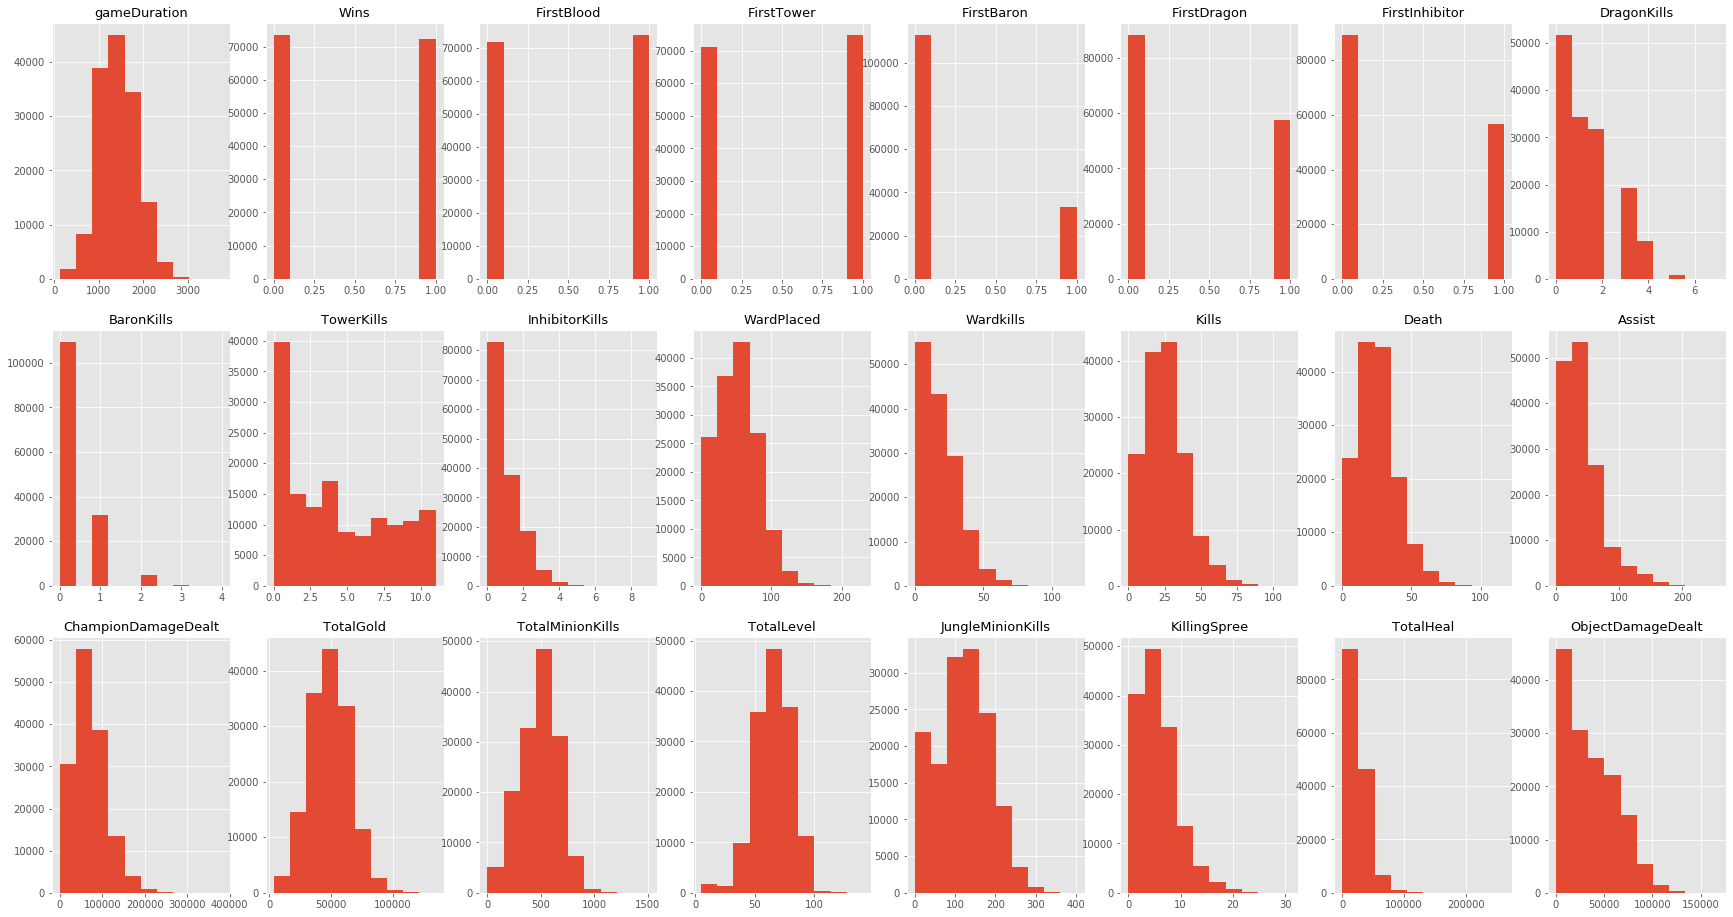

In [ ]:
cols = df_blue.columns
plt.figure(figsize=(30,16))
for i, col in enumerate(cols):
  plt.subplot(3,8,i+1)
  plt.hist(df_blue[col])
  plt.title(str(col),fontsize=13)
plt.show()

In [ ]:
# 전처리 함수
def Engineer(df):
  condi3 = (df['Kills'] >= 50) | (df['Death']>= 50) | (df['Assist'] >= 100) | (df['WardPlaced']>=120) | (df['Wardkills']>=60) | ((df['TotalLevel']>=90) | (df['TotalLevel']<=7))
  condi4 = (df['DragonKills']>=5) | (df['ChampionDamageDealt']>=120000) | (df['TotalMinionKills']>=850) | (df['JungleMinionKills']>=260)
  condi5 = (condi3 | condi4)

  df = df.loc[~condi5]
  df = df.reset_index(drop=True)

  condi1 = (df['gameDuration'] < 500) | (df['gameDuration'] > 2400)
  condi2 = (df['WardPlaced'] <= 5) & (df['Wardkills'] <= 5)
  condi = (condi1 | condi2)
  
  df = df.loc[~condi]
  df = df.reset_index(drop=True)

  df['Avg_CS'] = (df['JungleMinionKills'] + df['TotalMinionKills'])/5
  df['Avg_Level'] = df['TotalLevel'] / 5

  drop_col= ['JungleMinionKills','TotalMinionKills','TotalLevel']
  df.drop(columns=drop_col, inplace=True)

  return df

In [ ]:
df_blue = Engineer(df_blue)
df_blue.shape

(112507, 23)

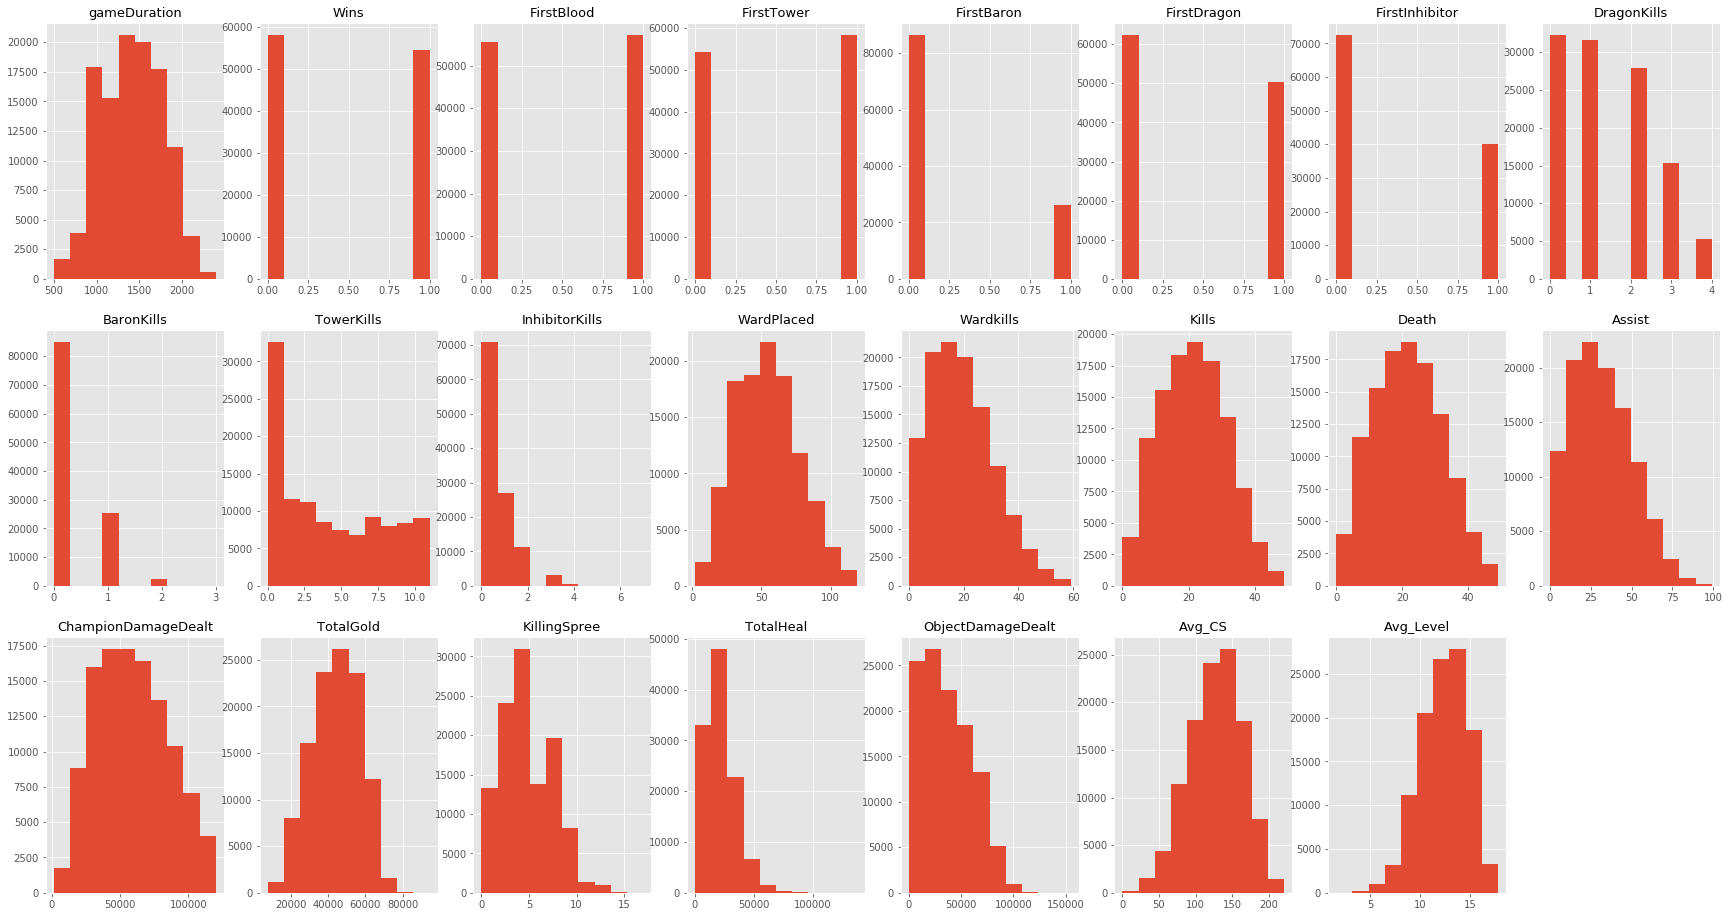

In [ ]:
cols = df_blue.columns
plt.figure(figsize=(30,16))
for i, col in enumerate(cols):
  plt.subplot(3,8,i+1)
  plt.hist(df_blue[col])
  plt.title(str(col),fontsize=13)
plt.show()

In [ ]:
def Engineer2(df):
  cond1 = (df['Assist']>65) | (df['BaronKills']>=3) | (df['InhibitorKills']>=4) | (df['Wardkills']>=45)
  cond2 = (df['TotalGold']>=66000) | (df['KillingSpree']>=10) | (df['TotalHeal']>=50000) | (df['Avg_CS']<=40.0) | (df['Avg_Level']<=8.0)

  cond3 = cond1|cond2
  df = df.loc[~cond3]
  df = df.reset_index(drop=True)
  
  drop_cols = ['gameDuration','KillingSpree','ObjectDamageDealt','TowerKills','InhibitorKills','Assist','TotalGold',
         'Wardkills','FirstDragon','TotalHeal','FirstBaron','FirstTower','FirstBlood','KillingSpree']
  df.drop(columns=drop_cols, inplace=True)

  return df

In [ ]:
df_blue=Engineer2(df_blue)

In [ ]:
cols = df_blue.columns
plt.figure(figsize=(20,14))
for i, col in enumerate(cols):
  plt.subplot(2,5,i+1)
  plt.hist(df_blue[col])
  plt.title(str(col),fontsize=13)
plt.show()

In [ ]:
df_blue.describe().iloc[:,0:11]

- kills, death의 min이 0인 것은 압도적으로 이겼거나, 졌을 때의 경기라 상관 x

In [ ]:
# 전처리 후 타겟 데이터 비율
df_blue.Wins.value_counts(normalize=True) 

In [ ]:
df_blue.corr().iloc[:,0:11]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score,classification_report
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier

In [ ]:
train, test = train_test_split(df_blue, test_size = 0.2, random_state=42)
train, val = train_test_split(train, test_size=0.2, random_state=42)

train.shape, val.shape, test.shape

In [ ]:
target = 'Wins'

X_train, y_train = train.drop(columns=target), train[target]
X_val, y_val = val.drop(columns=target), val[target]
X_test, y_test = test.drop(columns=target), test[target]
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [ ]:
# 기준모델 생성
base = y_train.mode()[0]
baseline = [base] * y_train
acc_score_base = accuracy_score(y_train, baseline)
acc_score_base

In [ ]:
# 랜덤포레스트

from sklearn.ensemble import RandomForestClassifier
pipe_rf = make_pipeline(
    RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1),
)
pipe_rf.fit(X_train, y_train)
print("훈련 정확도: ", pipe_rf.score(X_train, y_train))
print("검증 정확도: ", pipe_rf.score(X_val, y_val))

In [ ]:
pipe_rf.named_steps["randomforestclassifier"].oob_score_

In [ ]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe_rf, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax)
plt.show()

In [ ]:
tree = pipe_rf[0].estimators_[5]

In [ ]:
import graphviz
from sklearn.tree import export_graphviz

tree = tree = pipe_rf[0].estimators_[5]

dot_data = export_graphviz(tree,
                feature_names = X_val.columns,
                max_depth = 3, # 표현하고 싶은 최대 depth
                precision = 3, # 소수점 표기 자릿수
                filled = True, # class별 color 채우기
                rounded=True, # 박스의 모양을 둥글게
               )
graphviz.Source(dot_data)

In [ ]:
# 검증 세트의 점수
y_rf_pred = pipe_rf.predict(X_val)
print(classification_report(y_val,y_rf_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8076
           1       0.98      0.98      0.98      6707

    accuracy                           0.98     14783
   macro avg       0.98      0.98      0.98     14783
weighted avg       0.98      0.98      0.98     14783



In [ ]:
# xgboost 사용
pipe = make_pipeline(
    XGBClassifier(
        objective="binary:logistic",
        eval_metric="error",
        n_estimators=1000,
        random_state=42,
        n_jobs=-1,
        learning_rate=0.1,
        use_label_encoder=False,
    )
)
pipe.fit(X_train,y_train)

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(eval_metric='error', n_estimators=1000,
                               n_jobs=-1, random_state=42,
                               use_label_encoder=False))])

In [ ]:
print("검증 정확도", pipe.score(X_val, y_val))

y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

검증 정확도 0.9830210376784144
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      8076
           1       0.98      0.98      0.98      6707

    accuracy                           0.98     14783
   macro avg       0.98      0.98      0.98     14783
weighted avg       0.98      0.98      0.98     14783



In [ ]:
# Grid Search

params = {
    "xgbclassifier__max_depth": [2, 4, 6],
    "xgbclassifier__min_child_weight": [6, 10, 14],
    "xgbclassifier__colsample_bytree": [0.6, 0.8, 1.0],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(pipe, param_grid=params, scoring="f1", cv=3, verbose=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=6;, score=0.981 total time=  11.0s
[CV 2/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=6;, score=0.983 total time=  11.1s
[CV 3/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=6;, score=0.982 total time=  11.0s
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=10;, score=0.981 total time=  10.9s
[CV 2/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=10;, score=0.983 total time=  10.9s
[CV 3/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__max_depth=2, xgbclassifier__min_child_weight=10;, score=0.982 total time=  11.0s
[CV 1/3] END xgbclassifier__colsample_bytree=0.6, xgbclassifier__m

In [ ]:
print("최적 하이퍼파라미터: ", grid_search.best_params_)
print("최적 f1: ", grid_search.best_score_)


In [ ]:
pipe.named_steps

In [ ]:
feature_importances = list(
    zip(X_train.columns, pipe.named_steps["xgbclassifier"].feature_importances_)
)
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

plt.figure(figsize=(10, 10), dpi=120)
plt.barh(*list(zip(*feature_importances[::-1])))
plt.axvline(0.005, color="red", linewidth=0.5)
plt.show()

In [ ]:
def predict(X, y, best_estimator):
    y_pred_proba = pipe.predict_proba(X)[:, 1]
    report = classification_report(y, y_pred_proba > 0.5)
    return y_pred_proba, report

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


def plot_roc(y, y_pred_proba):
    auc_score = roc_auc_score(y, y_pred_proba)
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    baseline_fpr, baseline_tpr, _ = roc_curve(y, [0] * len(y))

    plt.style.use("ggplot")
    plt.plot(fpr, tpr, label="Model")
    plt.plot(baseline_fpr, baseline_tpr, linestyle="--", label="Baseline")
    plt.xlabel("False Positive Rate", size=12)
    plt.ylabel("True Positive Rate", size=12)
    plt.title("Receiver Operating Characteristic")
    plt.legend(prop={"size": 12})
    plt.show()
    return auc_score


y_test_pred_proba, report = predict(X_test, y_test, grid_search.best_estimator_)
print(report)
auc_score = plot_roc(y_test, y_test_pred_proba)

In [ ]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats.distributions import uniform

params = {
    "xgbclassifier__max_depth": [2, 4, 6],
    "xgbclassifier__min_child_weight": [2, 4, 8],
    "xgbclassifier__colsample_bytree": uniform(
        loc=0.5, scale=0.5
    ),  # 0.5 ~ 1 사이의 uniform 분포로 범위를 지정해 줍니다.
}

In [ ]:
random_search = RandomizedSearchCV(
    pipe,
    param_distributions=params,
    scoring="f1",
    n_iter=7,
    cv=3,
    verbose=3,
    random_state=42,
)
random_search.fit(X_train, y_train)

In [ ]:
print("최적 하이퍼파라미터: ", random_search.best_params_)
print("최적 f1: ", random_search.best_score_)

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

permuter = PermutationImportance(
     pipe.named_steps['xgbclassifier'],
     scoring='f1',
     n_iter=10,
     random_state=42
)
permuter.fit(X_test, y_test)

In [ ]:
feature_names = X_test.columns.tolist()
pi = pd.Series(permuter.feature_importances_, feature_names).sort_values()
pi.plot.barh()
plt.title("Permutation Importance")

In [ ]:
eli5.show_weights(
    permuter,
    top=None,  
    feature_names=feature_names,
)

In [ ]:
clf = random_search.best_estimator_

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

pdp_isolated = pdp_isolate(
  model=clf,
  dataset = X_test,
  model_features = X_test.columns,
  feature='Death',
  grid_type='percentile',
  num_grid_points=10,
)
pdp_plot(pdp_isolated, feature_name='Death')

In [ ]:
pdp_plot(
    pdp_isolated,
    feature_name='Death',
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)
plt.show()

In [ ]:
from pdpbox.pdp import pdp_isolate, pdp_plot

pdp_isolated = pdp_isolate(
  model=clf,
  dataset = X_test,
  model_features = X_test.columns,
  feature='Kills',
  grid_type='percentile',
  num_grid_points=10,
)
pdp_plot(pdp_isolated, feature_name='Kills')

In [ ]:
pdp_plot(
    pdp_isolated,
    feature_name='Kills',
    plot_lines=True,  # ICE plots
    frac_to_plot=50,  # float type을 입력하면 전체 데이터 갯수 중 plotting할 데이터 수의 비율이 됩니다. int type을 입력하면 데이터의 수가 됩니다.
    plot_pts_dist=True,
)
plt.show()